<a href="https://colab.research.google.com/github/Rainwoorimforest/pytorch-study/blob/main/Perceptron_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim

# MNIST를 이용하여 데이터셋 불러오기

In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 21.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 589kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.49MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.41MB/s]


In [ ]:
image,label = train_dataset[0] # sample
print(image.shape)
print(label)

torch.Size([1, 28, 28])
5


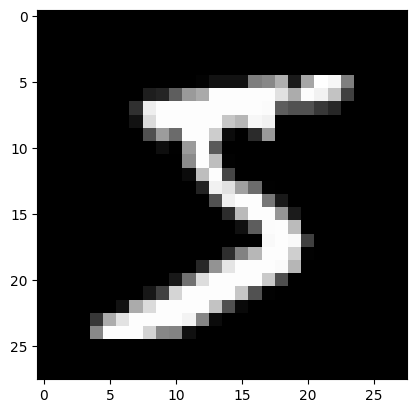

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(), cmap='gray')
plt.show()

# Perceptron

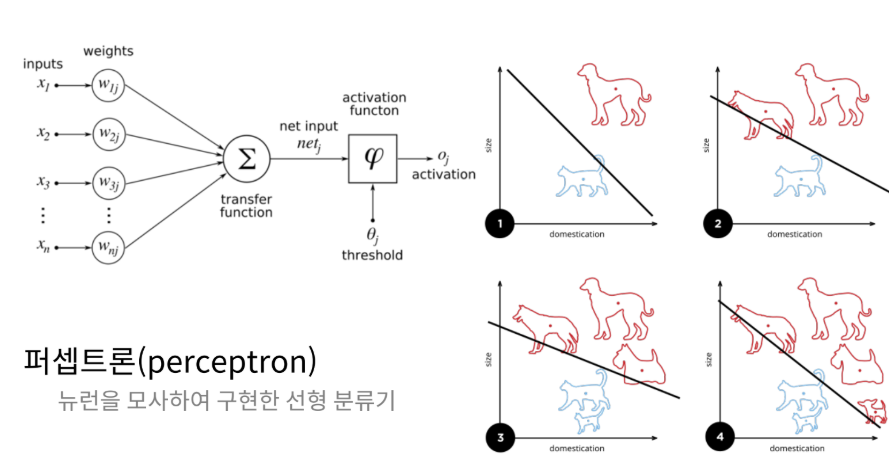

In [ ]:
# AND 연산

# data preparation
X = torch.tensor([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
], dtype = torch.float32)

y_and = torch.tensor([[0],[0],[0],[1]], dtype = torch.float32)

[참고]

* nn.Linear(input size, output size)
* nn.BCELoss(): Binary Cross Entropy Loss, 즉 이진 분류용 손실 함수
  * 모델의 출력이 **확률값(0~1)**일 때 사용하며, 정답도 0 또는 1로 되어 있어야 합니다.
  * L=−[y⋅log(p)+(1−y)⋅log(1−p)]
  * 𝑦
    : 정답 레이블 (0 또는 1)

    𝑝
    : 모델의 출력 (예측 확률)

* torch.optim: https://docs.pytorch.org/docs/stable/optim.html
* optimizer.step(): optimizer가 업데이트

In [ ]:
# Define Perceptron modle
class Perceptron(nn.Module):
    def __init__(self):
      super(Perceptron, self).__init__() # 이 부분 문법 상속 관련하여 꼼꼼하게
      self.linear = nn.Linear(2,1)
      self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      return self.sigmoid(self.linear(x))


# Training AND operation
model_and = Perceptron()
criterion = nn.BCELoss() # Binary Cross Entropy: 이진 분류용 손실 함수
optimizer_and = optim.SGD(model_and.parameters(), lr = 0.1)

for epoch in range(1000):
  optimizer_and.zero_grad() # 초기화할 때 언제 초기화되는지 수식 과정에서 설명
  output = model_and(X) # 모델 예측값
  loss = criterion(output, y_and) # criterion 함수가 뭐지: 오차를 측정하는 함수.
  loss.backward()
  optimizer_and.step()

print(model_and(X).round())

tensor([[0.],
        [0.],
        [0.],
        [1.]], grad_fn=<RoundBackward0>)


In [ ]:
# 그런 XOR 연산은 선형 Linear 모델로 학습 실패 : 선형 분류 불가능
y_xor = torch.tensor([[0],[1],[1],[0]], dtype=torch.float32)

model_xor = Perceptron()
optimizer_xor = optim.SGD(model_xor.parameters(), lr=0.1)

for epoch in range(1000):
  optimizer_xor.zero_grad()
  output = model_xor(X)
  loss = criterion(output, y_xor)
  loss.backward()
  optimizer_xor.step()

print(model_xor(X).round())

tensor([[0.],
        [0.],
        [0.],
        [1.]], grad_fn=<RoundBackward0>)


In [ ]:
# 퍼셉트론: 뉴런 1개
# 위에서 해결하지 못한 xor 선형 분류 문제의 해결은: 비선형 문제 = 퍼셉트론을 여러개 쌓자! = 다층 퍼셉트론(MLP) = nn.Linear 여러개를 쌓는다

class MLP(nn.Module):
  def __init__(self): # 층을 여러개 쌓기 시작!!
    super(MLP,self).__init__()
    self.hidden = nn.Linear(2,2) # input -> hidden
    self.output = nn.Linear(2,1) # hidden -> output
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.sigmoid(self.hidden(x))
    x = self.sigmoid(self.output(x))

    return x

model_xor = MLP()
optimizer_xor = optim.SGD(model_xor.parameters(), lr=0.1)

for epoch in range(15000):
  optimizer_xor.zero_grad()
  output = model_xor(X)
  loss = criterion(output, y_xor)
  loss.backward()
  optimizer_xor.step()

print(model_xor(X).round())


tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<RoundBackward0>)


## Loss function

| 손실 함수                                   | **용도**                       | **출력 함수**                  |
| --------------------------------------- | ---------------------------- | -------------------------- |
| `Binary Cross Entropy` (`nn.BCELoss`)   | 이진 분류 또는 각 클래스 독립적인 다중 라벨 분류 | `Sigmoid` (0\~1 확률)        |
| `Cross Entropy` (`nn.CrossEntropyLoss`) | 다중 클래스 분류 (클래스 간 배타적)        | `Softmax` (전체 합이 1인 확률 분포) |


## Activation function

[참고]
* gelu: https://docs.pytorch.org/docs/stable/generated/torch.nn.functional.gelu.html#torch.nn.functional.gelu

### gradient vanishing problem
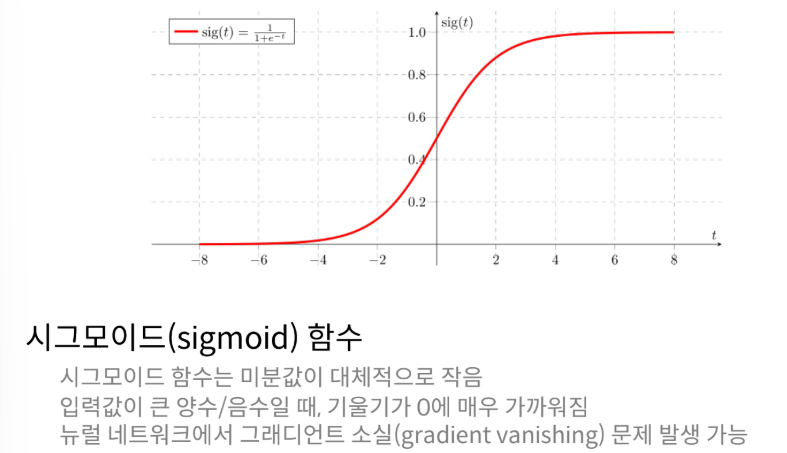

### 그레디언트 소실 문제가 왜 문제인 이유
Linear층에 output이 만약에 8이 나왔다고 하자, 그러면 위의 시그모이드 함수 그래프에도 나왔듯이 8에서의 기울기는 0에 가까워진다. 그래서 정보가 소실되는 문제가 생긴다.

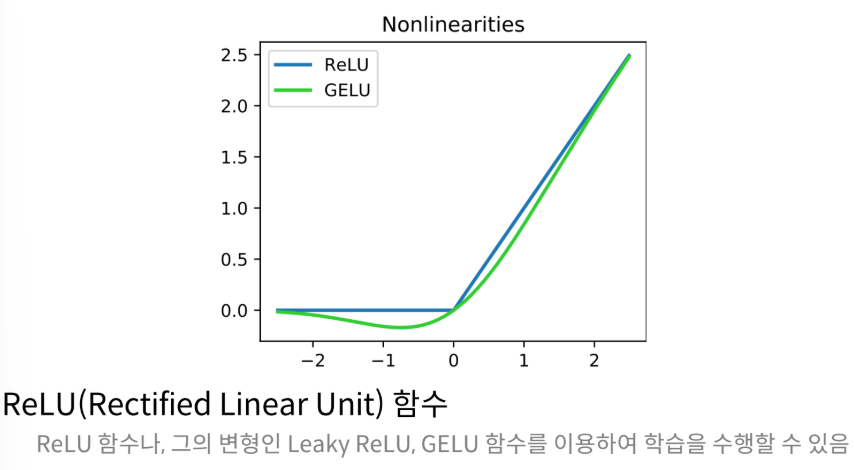

## 옵티마이저(Optimizer)

[참고]
* torch.optim: https://docs.pytorch.org/docs/stable/optim.html

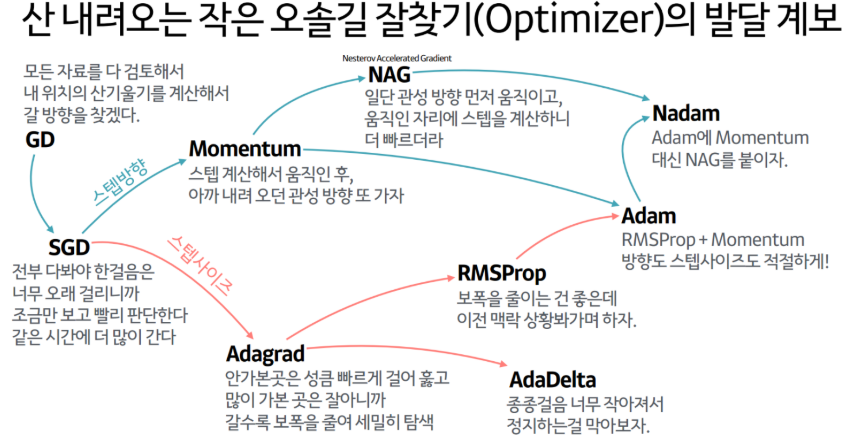

In [ ]:
# TODO: 데이터셋에 따라? 모델에 따라? 옵티마이저와 활성화 함수는 많이 라이브러리로 지원하는데, 옵티마이저와 활성화 함수 선택 기준은 무엇인가

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
# Set hyperparameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001
# Load MNIST dataset and preprocessing
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.1307,), (0.3081,))
])
train_dataset = torchvision.datasets.MNIST(
  root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(
  root='./data', train=False, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Define MLP Model
class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU() # instead of Softmax
    self.fc2 = nn.Linear(hidden_size, num_classes)
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

model = MLP(input_size, hidden_size, num_classes)

In [ ]:
# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # instead of SGD
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # Vectorize the MNIST image
    images = images.reshape(-1, input_size)
    # Forward-propagation
    outputs = model(images)
    loss = criterion(outputs, labels)
    # Back-propagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], '
            f'Step [{i+1}/{total_step}], '
            f'Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/600], Loss: 0.3500
Epoch [1/5], Step [200/600], Loss: 0.2278
Epoch [1/5], Step [300/600], Loss: 0.2592
Epoch [1/5], Step [400/600], Loss: 0.1097
Epoch [1/5], Step [500/600], Loss: 0.1640
Epoch [1/5], Step [600/600], Loss: 0.1385
Epoch [2/5], Step [100/600], Loss: 0.1263
Epoch [2/5], Step [200/600], Loss: 0.2314
Epoch [2/5], Step [300/600], Loss: 0.1535
Epoch [2/5], Step [400/600], Loss: 0.1409
Epoch [2/5], Step [500/600], Loss: 0.1105
Epoch [2/5], Step [600/600], Loss: 0.0855
Epoch [3/5], Step [100/600], Loss: 0.1652
Epoch [3/5], Step [200/600], Loss: 0.1626
Epoch [3/5], Step [300/600], Loss: 0.0805
Epoch [3/5], Step [400/600], Loss: 0.1928
Epoch [3/5], Step [500/600], Loss: 0.1684
Epoch [3/5], Step [600/600], Loss: 0.1137
Epoch [4/5], Step [100/600], Loss: 0.0414
Epoch [4/5], Step [200/600], Loss: 0.1286
Epoch [4/5], Step [300/600], Loss: 0.1106
Epoch [4/5], Step [400/600], Loss: 0.1637
Epoch [4/5], Step [500/600], Loss: 0.0969
Epoch [4/5], Step [600/600], Loss:

In [ ]:
# Testing the trained model
model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.reshape(-1, input_size)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1) # 이거!1
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Accuracy: {100 * correct / total}%')

Accuracy: 97.8%


## Normalization

* 아무렇게 초기화해도 언젠간 학습이 완료되긴한다고 연구가 있다.
* 하지만 우린 유한한 시간 내에, 유한한 메모리 사용량이 정해져있으므로 **적절한 가중치 초기화가 중요하다.**
* Xavier는 교수님이 자주 애용하시는 초기화 방식이긴하다. pytorch의 He initializer와 비슷하다. 내가 만약에 pytorch에서 가중치 초기화를 따로 안했으면 He initializer를 사용한거라 생각해라. 이게 디폴트

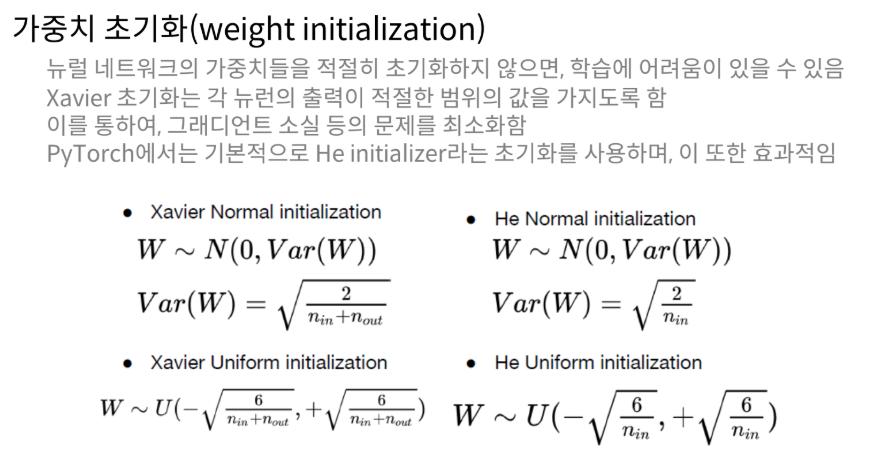

In [ ]:
import torch.nn.init as init

class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)
    # Xavier initialization
    self.xavier_init_weights()
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out
  def xavier_init_weights(self):
    for m in self.modules():
      if isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight)
        if m.bias is not None:
          init.constant_(m.bias, 0)
model = MLP(input_size, hidden_size, num_classes)

# ML에서의 두 가지 문제
* Overfitting
  * solutions
    * 1. 데이터수 늘리기
    * 2. dropout: 학습 시에 layer 몇개 비활성화
* Underfitting


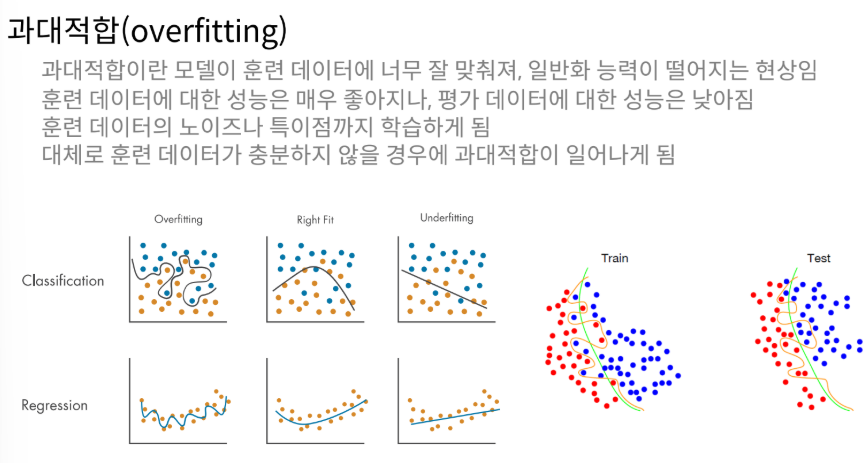




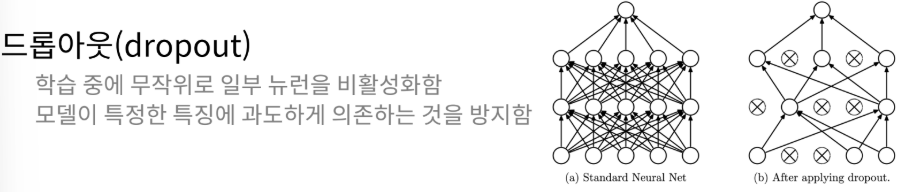

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes, dropout_rate):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(dropout_rate) # Add dropout layer
    self.fc2 = nn.Linear(hidden_size, num_classes)
  def forward(self, x):
    out = self.fc1(x) # 1
    out = self.relu(out) # 2
    out = self.dropout(out)# 3   -> 1->2->3 순으로 적자!. 사실 2와 3은 바뀌어도 잘 돌아가는게 맞다. 하지만 잘 배운 전공자에게는 이 순서로 씁시다..
    out = self.fc2(out)
    return out

model = MLP(input_size, hidden_size, num_classes, dropout_rate=0.5)

## Batch Noralization

배치가 너무 적으면 input에 대한 분포 차이가 너무 커짐

* 사실 정규화는 Batch말고도, Linear normalization도 있고 다양하다.


### 배치 정규화(batch normalization)
배치 정규화는 각 배치의 입력을 정규화하여 내부 공변량 이동을 줄임
이를 통해, 학습 속도를 향상시킬 수 있음
또한, 가중치 초기화의 민감도를 감소시키며, 과대적합을 방지할 수 있음

* 위에서 dropout에서 1,2,3 순서로 하는게 일반적인 관습(틀린건 아님)이지만 여기서는 forward순서를 필수로 지켜야. 학습이된다.

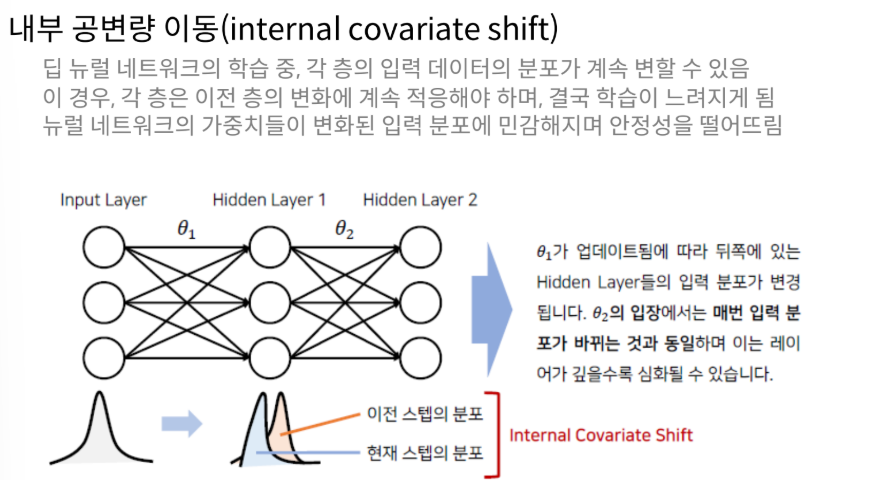

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.bn1 = nn.BatchNorm1d(hidden_size) # Add Batch Normalization
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)
  def forward(self, x):
    out = self.fc1(x) # 1 💛순서에 주의하자
    out = self.bn1(out) # 2
    out = self.relu(out) # 3
    out = self.fc2(out) # 4
    return out

model = MLP(input_size, hidden_size, num_classes)